# Diabetes Prediction

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
df = pd.read_csv(r"C:\Users\saini\Documents\Datasets\diabetes.csv")

### EDA report

In [63]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [38]:
df.size

6912

In [39]:
df.shape

(768, 9)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [42]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [44]:
corr = df.corr()

<AxesSubplot:>

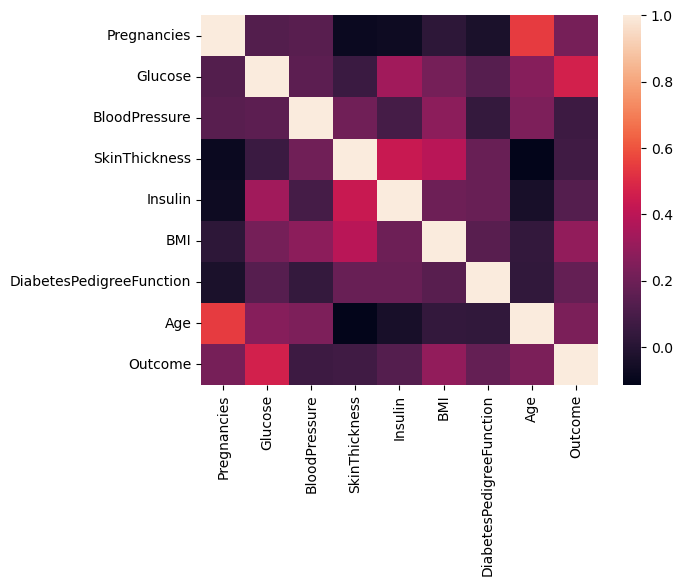

In [45]:
sns.heatmap(corr)

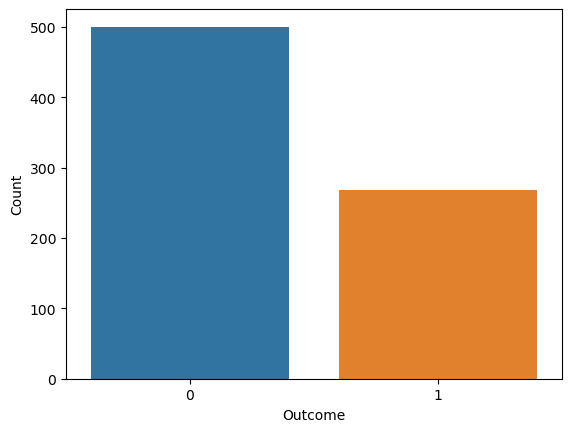

In [46]:
sns.countplot(x='Outcome', data=df)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

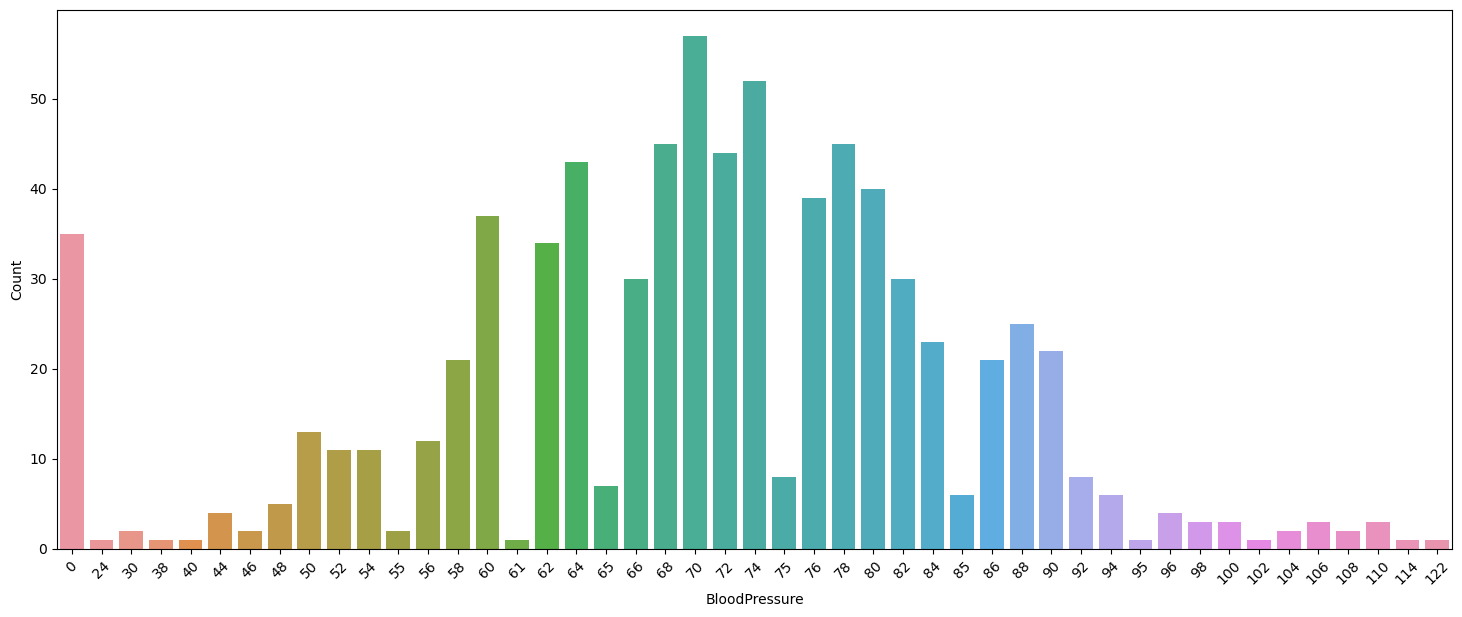

In [47]:
plt.figure(figsize=(18, 7))

sns.countplot(x=df['BloodPressure'], data=df, dodge=True)

plt.xlabel('BloodPressure')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

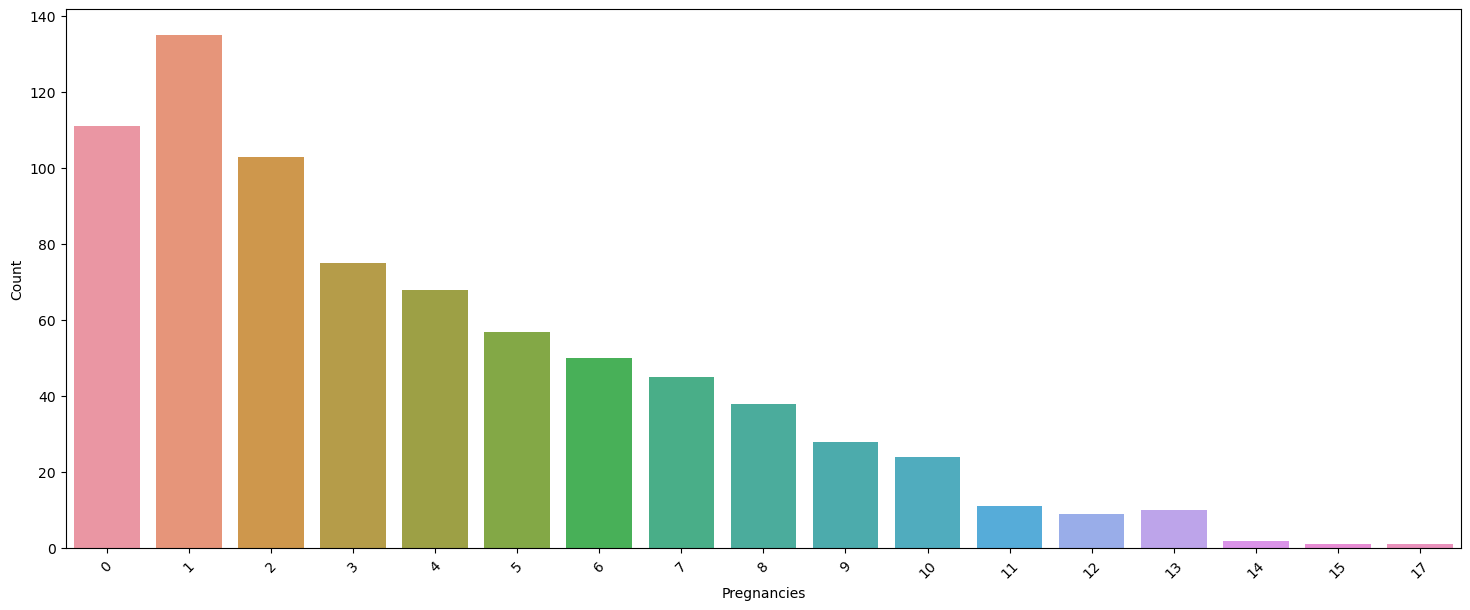

In [48]:
plt.figure(figsize=(18, 7))

sns.countplot(x=df['Pregnancies'], data=df, dodge=True)

plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

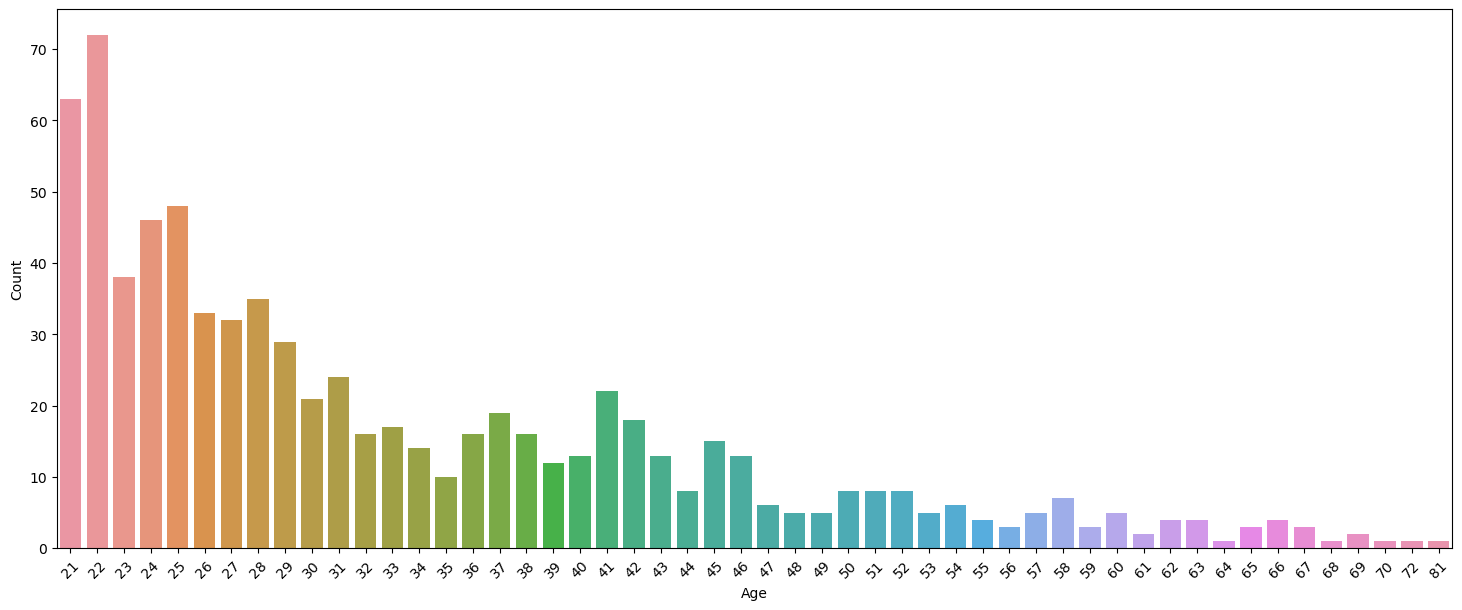

In [49]:
plt.figure(figsize=(18, 7))

sns.countplot(x=df['Age'], data=df, dodge=True)

plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

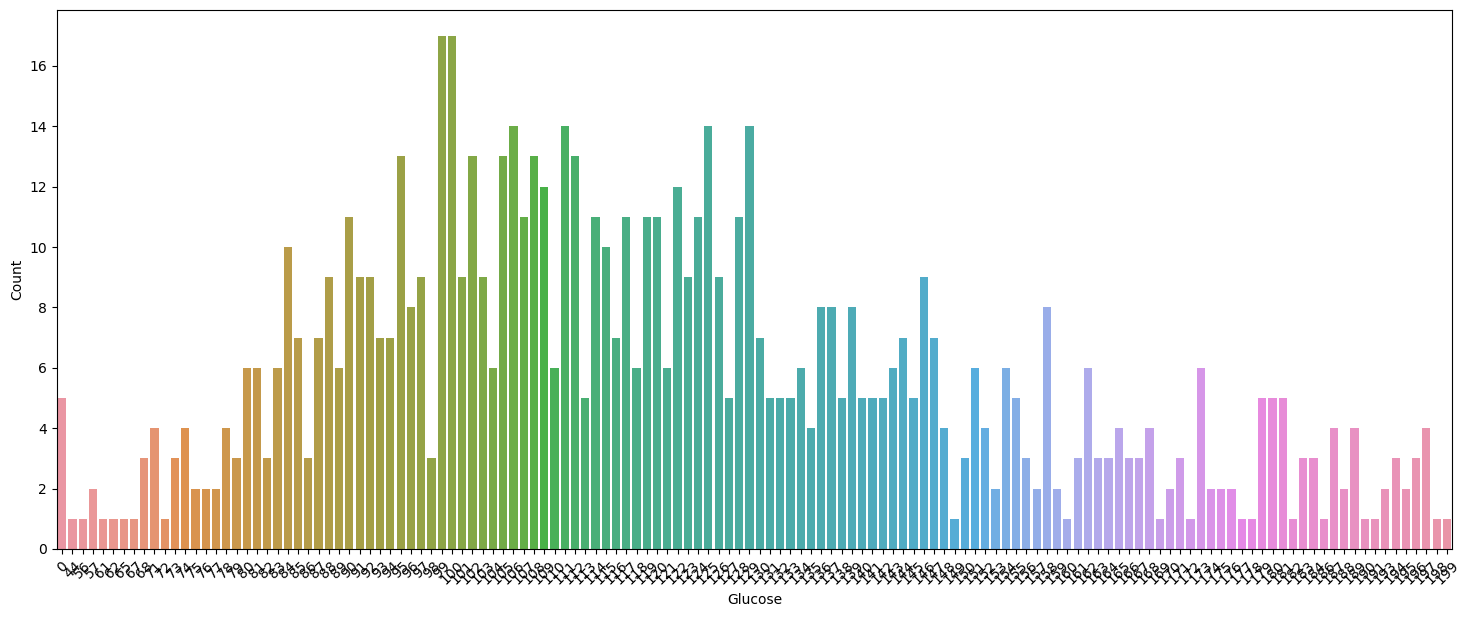

In [50]:
plt.figure(figsize=(18, 7))

sns.countplot(x=df['Glucose'], data=df, dodge=True)

plt.xlabel('Glucose')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

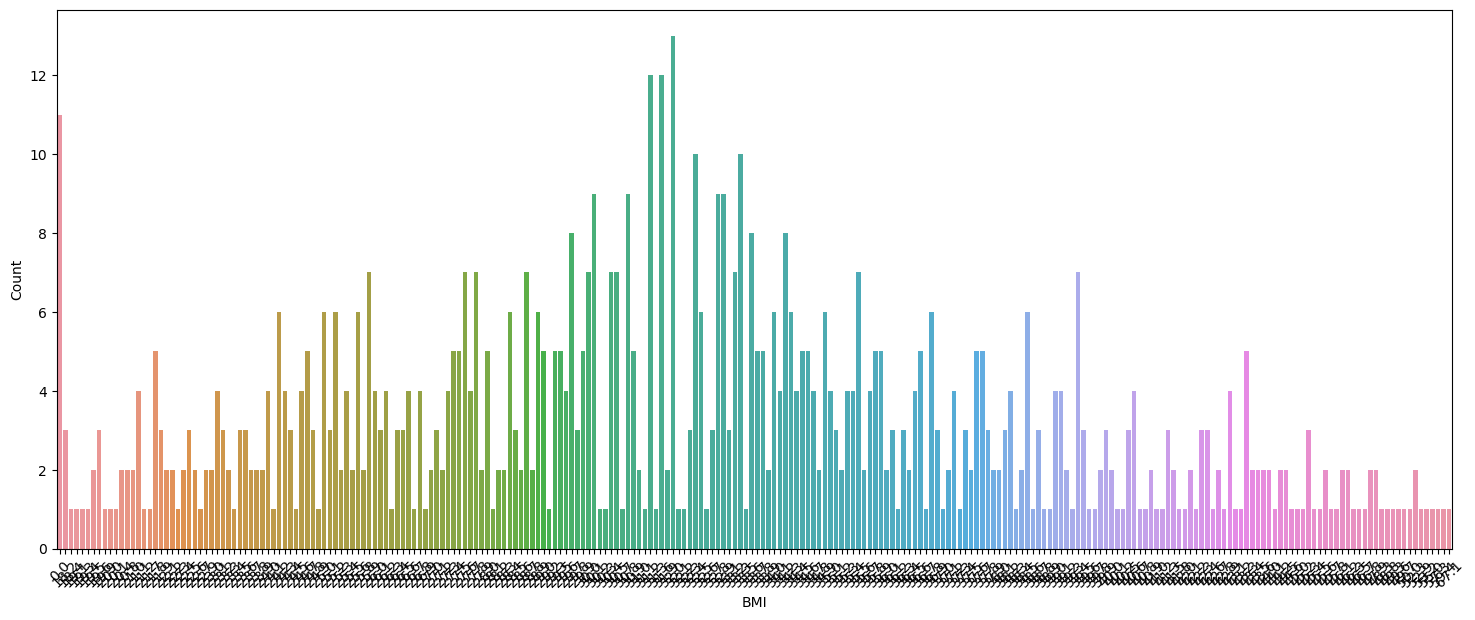

In [51]:
plt.figure(figsize=(18, 7))

sns.countplot(x=df['BMI'], data=df, dodge=True)

plt.xlabel('BMI')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

#### Relpacing the unwanted zeroes

In [52]:


# Replacing 0 values of Glucose  
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())  
  
# Filling 0 values of Blood Pressure  
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())   
  
# Replacing 0 values in BMI  
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

In [53]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      20.536458   79.799479   
std       3.369578   30.438286      12.096642      15.952218  115.244002   
min       0.000000   44.000000      24.000000       0.000000    0.000000   
25%       1.000000   99.750000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

C:\Users\saini\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\saini\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

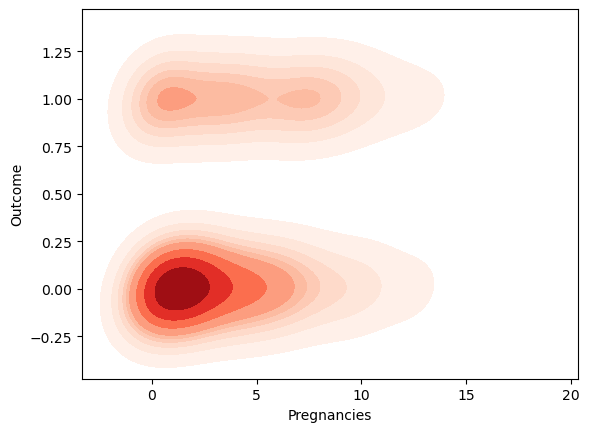

In [54]:
preg = df['Pregnancies']
output = df['Outcome']

sns.kdeplot(preg, output, shade=True, cmap='Reds', shade_lowest=False)

### Model Building Building

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, shuffle=None)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

model = LogisticRegression(max_iter=1000)  # Increase the max_iter value

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Training the model
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

accuracy_model = accuracy_score(y_test, y_pred)
print('Accuracy of the Logistic Regression model : ', accuracy_model*100,'%')

Accuracy of the Logistic Regression model :  81.81818181818183 %


#### Creating a pickle

In [41]:
import pickle

filename = 'model_diabetics.pkl'
pickle.dump(model, open(filename, 'wb'))

In [58]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [62]:
model.predict([[8, 183, 64, 0, 0, 23.3, 0.672, 32]])

C:\Users\saini\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)